In [40]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from IPython.display import HTML
from graphviz import Source
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [20]:
style ='<style>svg{width: 50% !important; height: 50% !important;}</style>'
HTML(style)

In [8]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [14]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [15]:
X = X.fillna({'Age':X['Age'].median()})
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [16]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

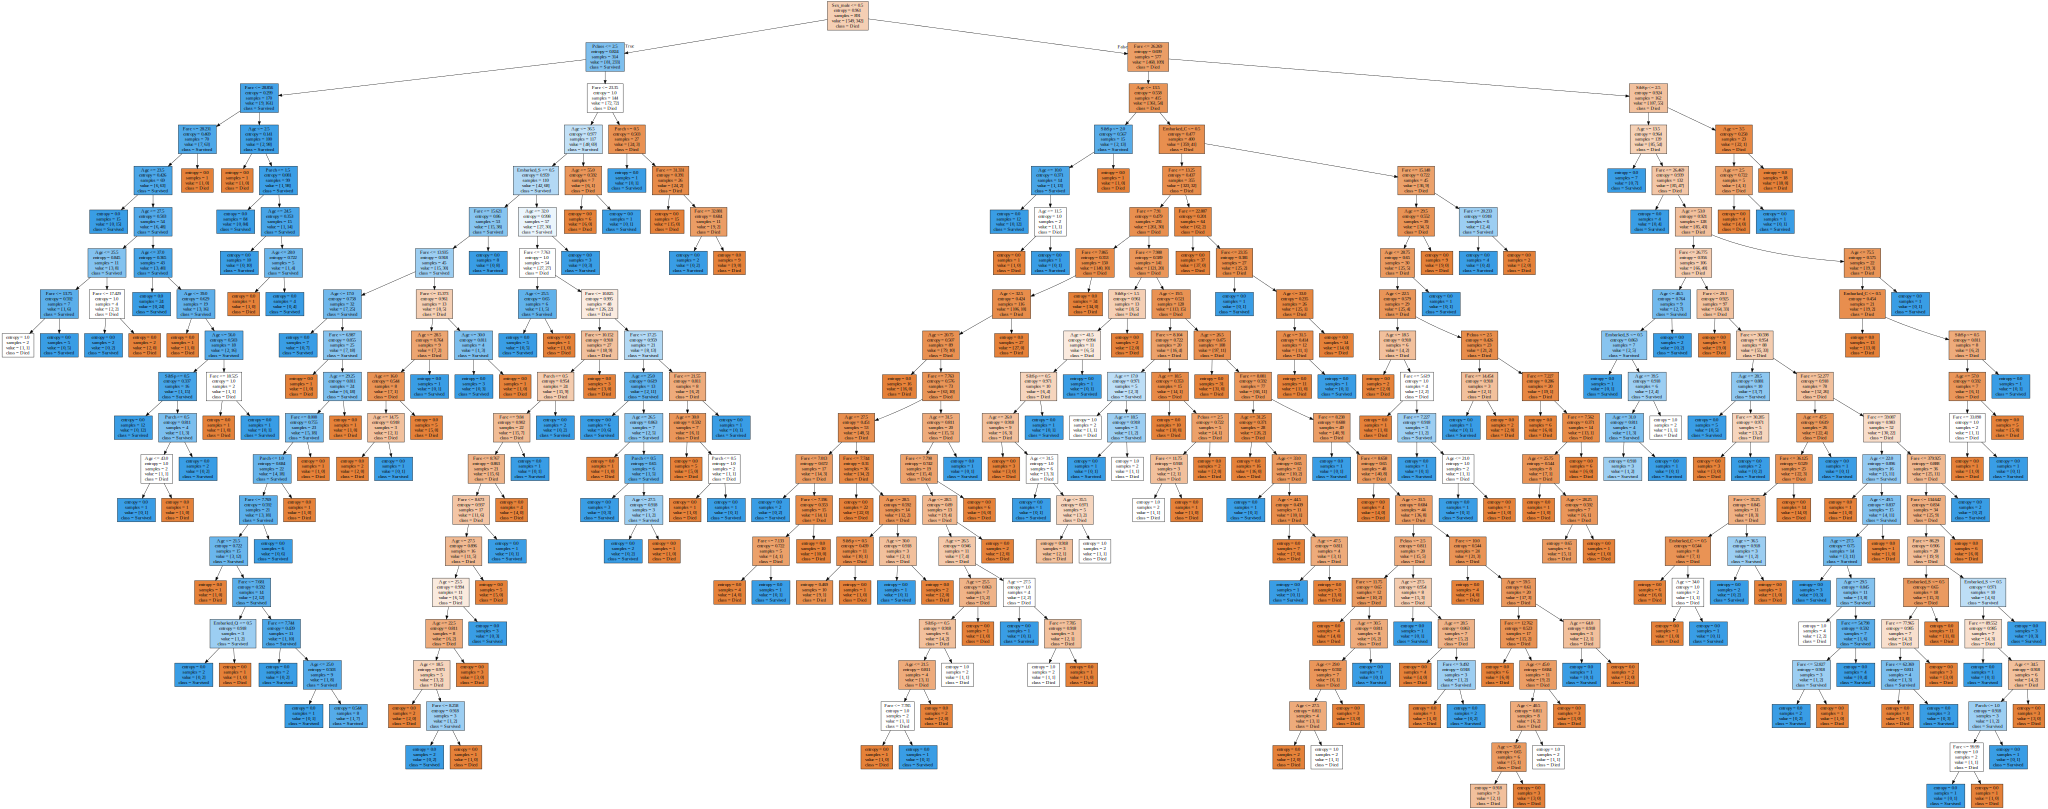

In [21]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),\
                                    class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9798657718120806

In [26]:
clf.score(X_test, y_test)

0.7694915254237288

In [35]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4) 
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.823728813559322

In [36]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score], 'test_score':[test_score]})
    scores_data = scores_data.append(temp_score_data)

In [38]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score'], \
                          var_name = 'set_type', value_name = 'score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


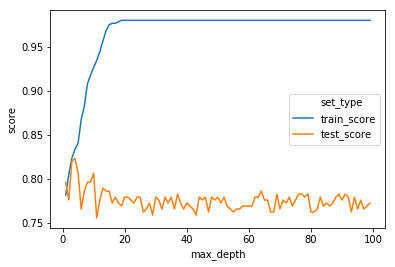

In [39]:
sns.lineplot(x='max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [42]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7835799743626264

In [43]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score], \
                                    'test_score':[test_score], 'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.806780,0.805345


In [44]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score', 'cross_val_score'], \
                          var_name = 'set_type', value_name = 'score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


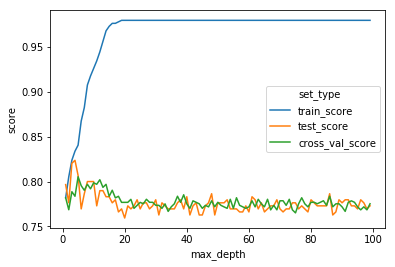

In [45]:
sns.lineplot(x='max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [47]:
best_clf = clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7898305084745763